In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import random

train_path = '/content/drive/MyDrive/ML_PROJECT/train.gz'

# Reading train data
train = pd.read_csv(train_path, skiprows=sorted(random.sample(range(1, 40428967), 35428967)))
train['hour'] = pd.to_datetime(train['hour'], format='%y%m%d%H')  # Convert afterward
print(train.head(2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                     id  click       hour    C1  banner_pos   site_id  \
0  10005334911727438633      0 2014-10-21  1010           1  85f751fd   
1  10005609489911213467      1 2014-10-21  1005           0  85f751fd   

  site_domain site_category    app_id app_domain  ... device_type  \
0    c4e18dd6      50e219e0  ffc6ffd0   7801e8d9  ...           4   
1    c4e18dd6      50e219e0  54c5d545   2347f47a  ...           1   

  device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  
0                0  21665  320   50  2493    3   35      -1  117  
1                0  21611  320   50  2480    3  297  100111   61  

[2 rows x 24 columns]


In [ ]:
train['month'] = train['hour'].dt.month
train['dayofweek'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['hour_time'] = train['hour'].dt.hour
train.head(2)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
0,10005334911727438633,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,50,2493,3,35,-1,117,10,1,21,0
1,10005609489911213467,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,50,2480,3,297,100111,61,10,1,21,0


In [ ]:
# Check for null values in the training data
null_values = train.isnull().sum()
print(null_values[null_values > 0])


Series([], dtype: int64)


In [ ]:
train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
count,5.000000e+06,5.000000e+06,5000000,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5000000.0,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.223944e+18,1.698616e-01,2014-10-25 22:32:16.321920256,1.004968e+03,2.879520e-01,1.015165e+00,3.312450e-01,1.884114e+04,3.188876e+02,6.010881e+01,2.112567e+03,1.432913e+00,2.270007e+02,5.321526e+04,8.338053e+01,10.0,2.601413e+00,2.546919e+01,1.127734e+01
min,7.750740e+12,0.000000e+00,2014-10-21 00:00:00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00,10.0,0.000000e+00,2.100000e+01,0.000000e+00
25%,4.608994e+18,0.000000e+00,2014-10-23 04:00:00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01,10.0,1.000000e+00,2.300000e+01,6.000000e+00
50%,9.226489e+18,0.000000e+00,2014-10-26 02:00:00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01,10.0,2.000000e+00,2.600000e+01,1.100000e+01
75%,1.384077e+19,0.000000e+00,2014-10-28 14:00:00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000940e+05,1.010000e+02,10.0,4.000000e+00,2.800000e+01,1.600000e+01
max,1.844674e+19,1.000000e+00,2014-10-30 23:00:00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02,10.0,6.000000e+00,3.000000e+01,2.300000e+01
std,5.326885e+18,3.755112e-01,NaN,1.094467e+00,5.065650e-01,5.271298e-01,8.547123e-01,4.959298e+03,2.140737e+01,4.734456e+01,6.094491e+02,1.326224e+00,3.509185e+02,4.995693e+04,7.027856e+01,0.0,1.727643e+00,2.964037e+00,5.955704e+00


In [ ]:
import numpy as np


In [ ]:
# outliers
for c in ['C15', 'C16', 'C19', 'C21']:
    train[c] = np.where(train[c] > train[c].quantile(0.98), train[c].quantile(0.98), train[c])

In [ ]:
# Separate columns into numerical and categorical
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Display the categorized columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
Categorical Columns: ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


click
0    0.83017
1    0.16983
Name: proportion, dtype: float64




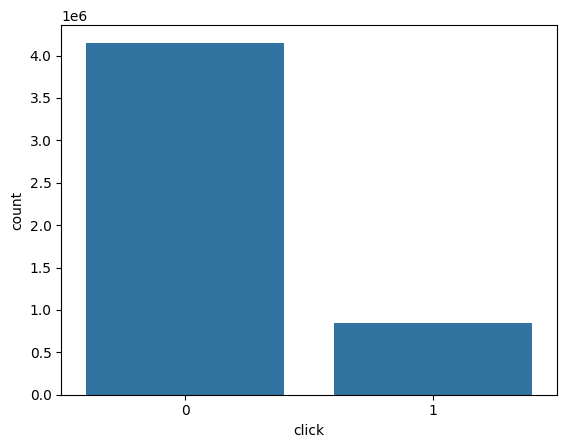

In [ ]:
print(train.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x='click', data=train)
plt.show()

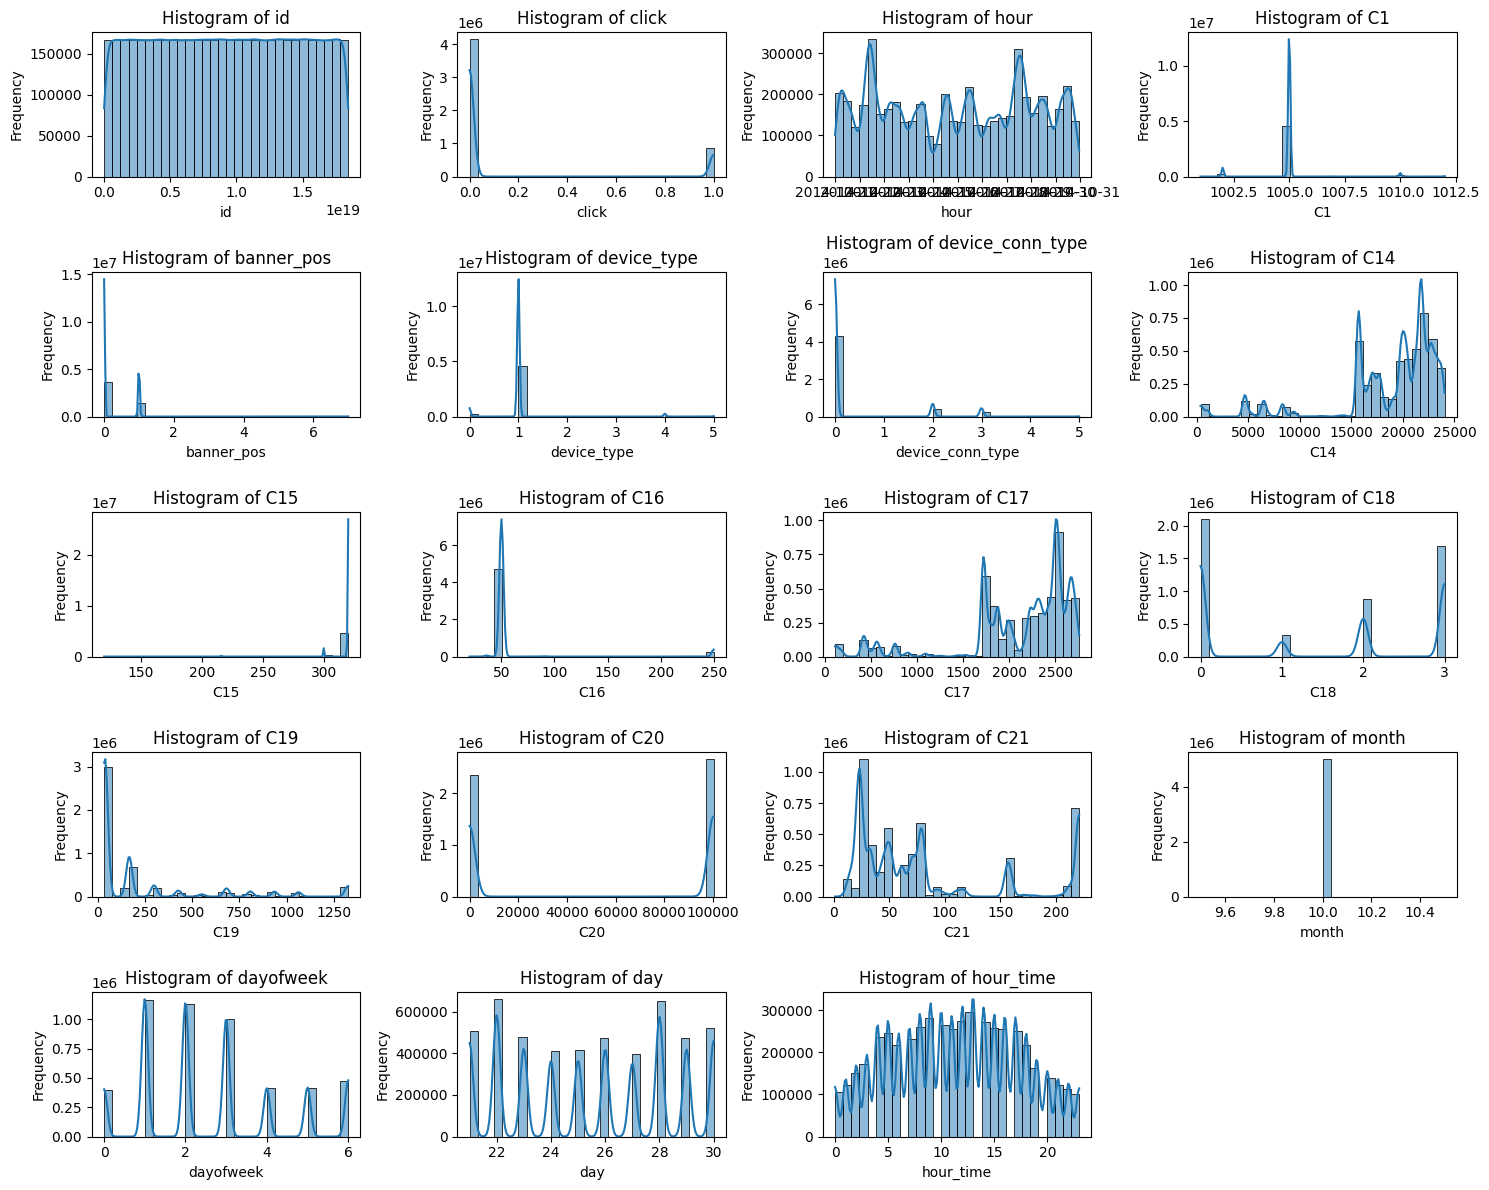

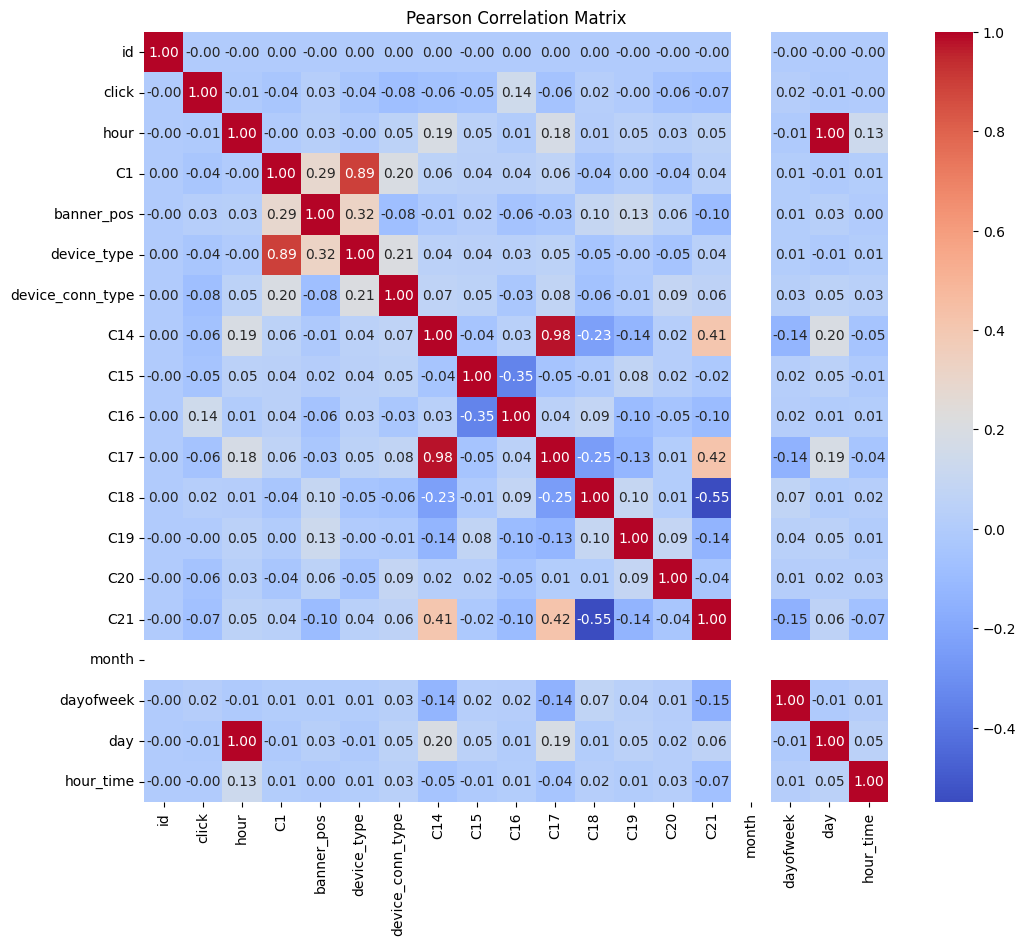

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
                  'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
                  'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour_time']

# Histograms for numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pearson correlation
correlation_matrix = train[numerical_cols].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()


In [ ]:
train.drop(['month', 'C20'], axis=1, inplace=True)
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day',
       'hour_time'],
      dtype='object')

In [ ]:
# unnecessary columns
train = train.drop(columns=['id', 'hour'])

# Renaming 'click' to 'y'
train = train.rename(columns={'click': 'y'})

# Renaming 'hour_time' to 'hour'
train = train.rename(columns={'hour_time': 'hour'})


In [ ]:
train = train.drop(columns=['C17'])   #C14 and C17 correlated

In [ ]:
# sampling data
sampled_data = train.sample(frac=0.1, random_state=42)
X = sampled_data.drop(['y'], axis=1)
y = sampled_data['y']

In [ ]:
pip install category-encoders


In [ ]:
import category_encoders as ce

# Initialize the target encoder
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_conn_type,C14,C15,C16,C18,C19,C21,dayofweek,day,hour
3577888,1005,1,0.295284,0.256088,0.179358,0.199236,0.195613,0.199813,0.174489,0.147934,...,0,22812,320.0,50.0,2,35.0,23.0,1,28,10
4993932,1005,0,0.118332,0.122170,0.127951,0.196317,0.196317,0.107889,0.174489,0.183087,...,0,20633,320.0,50.0,3,39.0,23.0,3,30,23


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn import metrics


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


Original dataset shape  Counter({0: 414970, 1: 85030})
Resampled dataset shape Counter({0: 414970, 1: 414970})


In [ ]:
x_new.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_conn_type,C14,C15,C16,C18,C19,C21,dayofweek,day,hour
0,1005,1,0.098545,0.257382,0.179345,0.197094,0.193338,0.197663,0.173186,0.082220,...,0,22268,320.0,50.0,3,815.0,42.0,1,28,10
1,1005,0,0.202156,0.202156,0.204292,0.197094,0.193338,0.197663,0.173186,0.277263,...,0,22676,320.0,50.0,0,35.0,51.0,3,30,23


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [ ]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_conn_type,C14,C15,C16,C18,C19,C21,dayofweek,day,hour
340866,0.363636,0.000000,0.154674,0.174582,0.245472,0.049689,0.061027,0.361915,0.221963,0.233155,...,0.0,0.897245,1.0,0.130435,1.0,0.205564,0.272727,0.500000,1.0,0.826087
426726,0.363636,0.142857,0.060683,0.067741,0.344217,0.205008,0.271108,0.788837,0.221963,0.233155,...,0.0,0.827066,1.0,0.130435,1.0,0.103555,0.100000,0.166667,0.0,0.173913


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_data(scaler, X_test):
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
    return X_test

def evaluate_model(model, X, y_true, dataset_name="test"):
    y_pred = model.predict(X)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
    TP = cnf_matrix[1, 1]  # True Positives
    TN = cnf_matrix[0, 0]  # True Negatives
    FP = cnf_matrix[0, 1]  # False Positives
    FN = cnf_matrix[1, 0]  # False Negatives
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    return {
        "dataset": dataset_name,
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "confusion_matrix": cnf_matrix,
    }

def plot_roc_curve(model, X_test, y_test, title="Receiver Operating Characteristic"):
    if (title=="Perceptron ROC Curve"):
      probs = model.decision_function(X_test)
    else:
      probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = metrics.roc_curve(y_test, probs)
    auc_score = metrics.roc_auc_score(y_test, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def store_results(outcome_df, model_name, train_metrics, test_metrics):
    entry = {
        "Model": model_name,
        "Accuracy_train": train_metrics["accuracy"],
        "Recall_train": train_metrics["recall"],
        "Precision_train": train_metrics["precision"],
        "Accuracy_test": test_metrics["accuracy"],
        "Recall_test": test_metrics["recall"],
        "Precision_test": test_metrics["precision"],
    }
    result_df = pd.DataFrame([entry])
    return pd.concat([outcome_df, result_df], ignore_index=True)

In [ ]:
from sklearn.linear_model import LogisticRegression


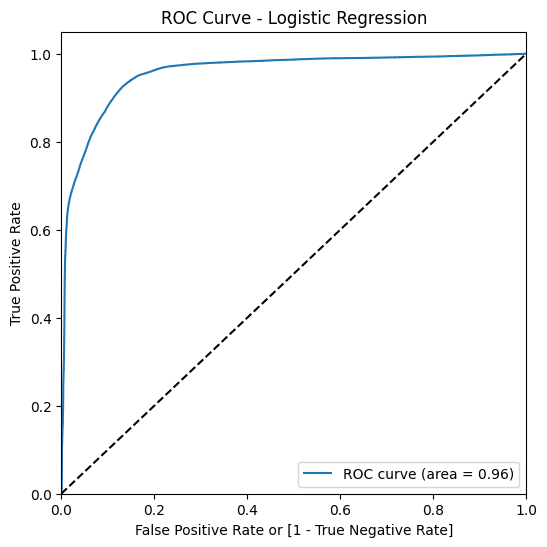

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.89115,0.884767,0.896206


In [ ]:
outcome = pd.DataFrame()

# Preprocess test data
X_test = preprocess_data(scaler, X_test)

# Logistic Regression Example
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_train_metrics = evaluate_model(logistic_model, X_train, y_train, "train")
logistic_test_metrics = evaluate_model(logistic_model, X_test, y_test, "test")
outcome = store_results(outcome, "Logistic Regression", logistic_train_metrics, logistic_test_metrics)
plot_roc_curve(logistic_model, X_test, y_test, title="ROC Curve - Logistic Regression")
outcome

In [ ]:
from sklearn.tree import DecisionTreeClassifier


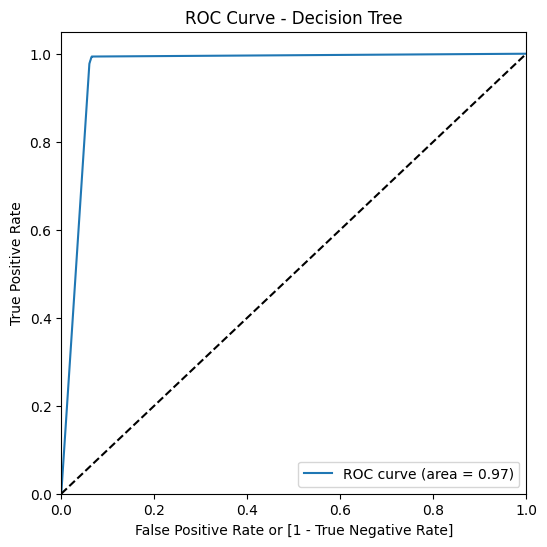

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.891150,0.884767,0.896206
1,Decision Tree,0.996898,0.998643,0.995170,0.963128,0.990677,0.938944


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_train_metrics = evaluate_model(dt_model, X_train, y_train, "train")
dt_test_metrics = evaluate_model(dt_model, X_test, y_test, "test")
outcome = store_results(outcome, "Decision Tree", dt_train_metrics, dt_test_metrics)
plot_roc_curve(dt_model, X_test, y_test, title="ROC Curve - Decision Tree")
outcome


In [ ]:
from sklearn.ensemble import RandomForestClassifier


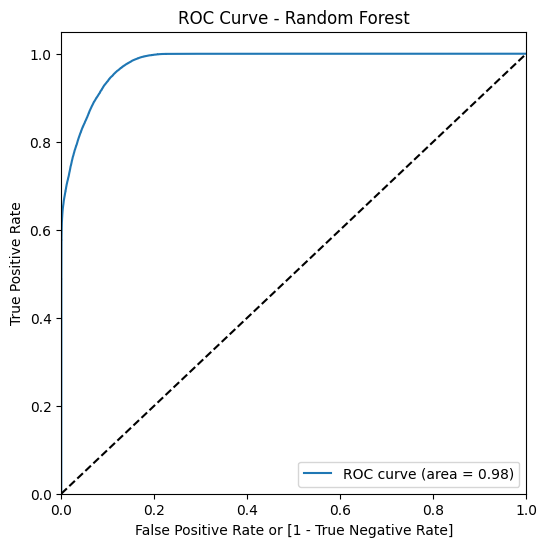

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.891150,0.884767,0.896206
1,Decision Tree,0.996898,0.998643,0.995170,0.963128,0.990677,0.938944
2,Random Forest,0.924325,0.975285,0.885079,0.919055,0.972271,0.878745


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=16, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_train_metrics = evaluate_model(rf_model, X_train, y_train, "train")
rf_test_metrics = evaluate_model(rf_model, X_test, y_test, "test")
outcome = store_results(outcome, "Random Forest", rf_train_metrics, rf_test_metrics)
plot_roc_curve(rf_model, X_test, y_test, title="ROC Curve - Random Forest")

outcome


Cross-Validation Scores (5 folds): [0.95684785 0.95592642 0.95576242 0.95653746 0.95730389]
Mean CV Score: 0.9565


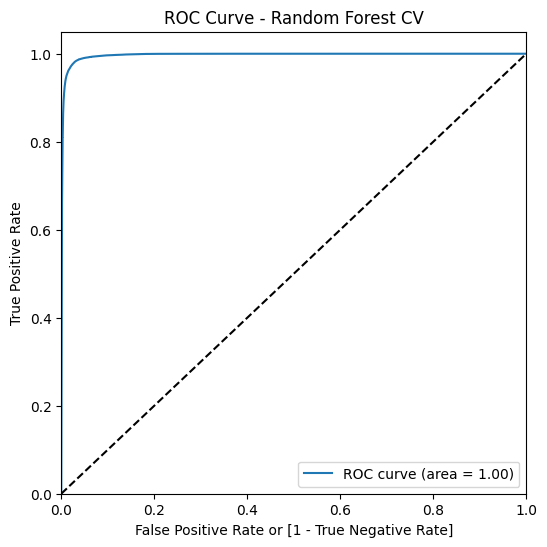

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.891150,0.884767,0.896206
1,Decision Tree,0.996898,0.998643,0.995170,0.963128,0.990677,0.938944
2,Random Forest,0.924325,0.975285,0.885079,0.919055,0.972271,0.878745
3,Random Forest CV,0.996898,0.999146,0.994674,0.963956,0.993015,0.938473


In [ ]:
# Random Forest CV = 5
rf_modelcv = RandomForestClassifier(random_state=42)
rf_modelcv.fit(X_train, y_train)
rfcv_train_metrics = evaluate_model(rf_modelcv, X_train, y_train, "train")
rfcv_test_metrics = evaluate_model(rf_modelcv, X_test, y_test, "test")

cv_scores = cross_val_score(rf_modelcv, X_train, y_train, cv=5)
print(f"Cross-Validation Scores ({5} folds): {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")

outcome = store_results(outcome, "Random Forest CV", rfcv_train_metrics, rfcv_test_metrics)

plot_roc_curve(rf_modelcv, X_test, y_test, title="ROC Curve - Random Forest CV")

outcome


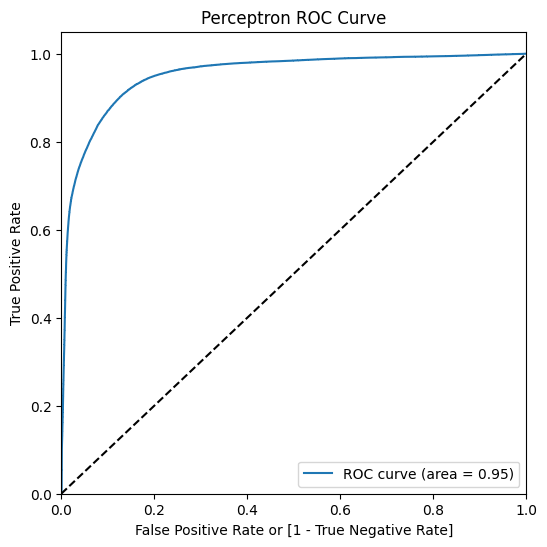

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.891150,0.884767,0.896206
1,Decision Tree,0.996898,0.998643,0.995170,0.963128,0.990677,0.938944
2,Random Forest,0.924325,0.975285,0.885079,0.919055,0.972271,0.878745
3,Random Forest CV,0.996898,0.999146,0.994674,0.963956,0.993015,0.938473
4,Perceptron,0.880911,0.840570,0.914342,0.879889,0.840079,0.912752


In [ ]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron_model.fit(X_train, y_train)

train_metrics_perceptron = evaluate_model(perceptron_model, X_train, y_train, dataset_name="train")
test_metrics_perceptron = evaluate_model(perceptron_model, X_test, y_test, dataset_name="test")

plot_roc_curve(perceptron_model, X_test, y_test, title="Perceptron ROC Curve")
outcome = store_results(outcome, "Perceptron", train_metrics_perceptron, test_metrics_perceptron)

outcome


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


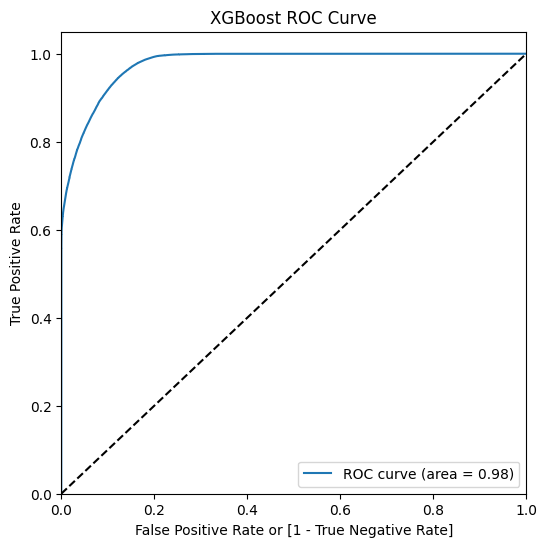

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,Logistic Regression,0.892254,0.884192,0.898683,0.891150,0.884767,0.896206
1,Decision Tree,0.996898,0.998643,0.995170,0.963128,0.990677,0.938944
2,Random Forest,0.924325,0.975285,0.885079,0.919055,0.972271,0.878745
3,Random Forest CV,0.996898,0.999146,0.994674,0.963956,0.993015,0.938473
4,Perceptron,0.880911,0.840570,0.914342,0.879889,0.840079,0.912752
5,XGBoost,0.912507,0.953932,0.880946,0.911171,0.953680,0.878952


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

train_metrics_xgb = evaluate_model(xgb_model, X_train, y_train, dataset_name="train")
test_metrics_xgb = evaluate_model(xgb_model, X_test, y_test, dataset_name="test")

plot_roc_curve(xgb_model, X_test, y_test, title="XGBoost ROC Curve")

outcome = store_results(outcome, "XGBoost", train_metrics_xgb, test_metrics_xgb)

outcome


Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:51:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 100}


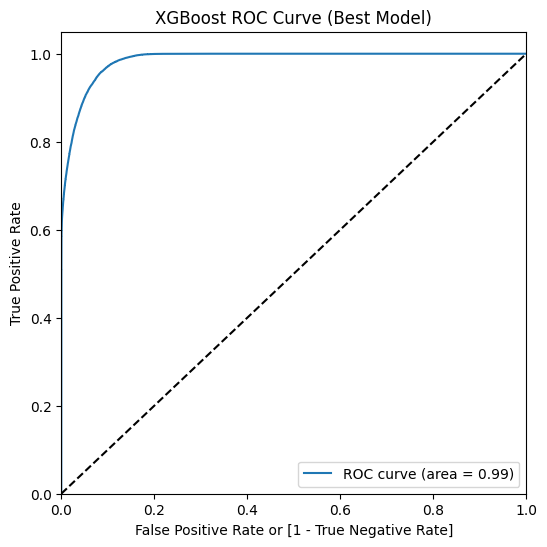

,Model,Accuracy_train,Recall_train,Precision_train,Accuracy_test,Recall_test,Precision_test
0,XGBoost (Grid Search),0.952151,0.98142,0.927147,0.935272,0.972665,0.904986


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# X_test = preprocess_data(scaler, X_test)
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 16, 8]
}

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

gridbest = pd.DataFrame()
# Evaluate the best model
train_metrics_xgb = evaluate_model(best_xgb_model, X_train, y_train, dataset_name="train")
test_metrics_xgb = evaluate_model(best_xgb_model, X_test, y_test, dataset_name="test")
plot_roc_curve(best_xgb_model, X_test, y_test, title="XGBoost ROC Curve (Best Model)")
gridbest = store_results(gridbest, "XGBoost (Grid Search)", train_metrics_xgb, test_metrics_xgb)

gridbest